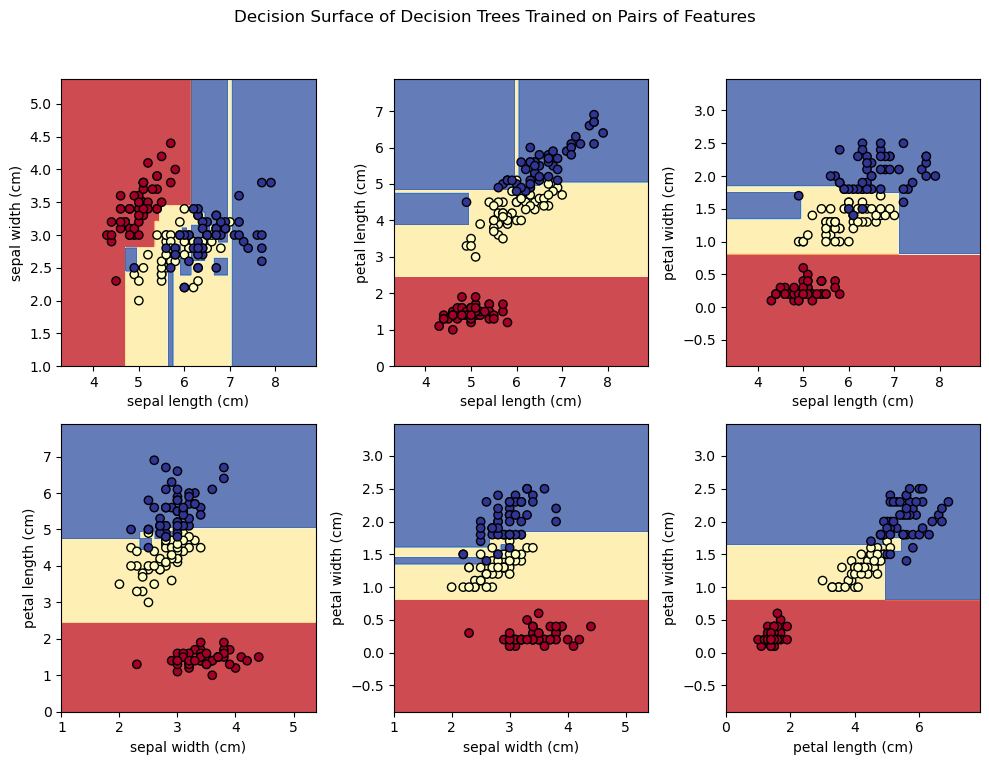

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
plot_colors = "ryb"
plot_step = 0.02 

# Generate all pairs of features
pairs = combinations(range(X.shape[1]), 2)

# Set up the plot
plt.figure(figsize=(10, 8)) 

# Loop through pairs of features
for i, (pair_1, pair_2) in enumerate(pairs):
    # Select the feature pair
    X_pair = X[:, [pair_1, pair_2]]
    
    # Fit the decision tree classifier
    clf = DecisionTreeClassifier().fit(X_pair, y)
    
    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    # Predict using the classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create subplots for each feature pair
    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair_1])
    plt.ylabel(iris.feature_names[pair_2])

# Set the main title and adjust layout
plt.suptitle("Decision Surface of Decision Trees Trained on Pairs of Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()